In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

import sys,random

%load_ext autoreload
%autoreload 2

sys.path.append('..')
from util import provas,load_padr,score_inep, notas_sisu, params_inep,load_acertos


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
sns.set_theme(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1.3,
    color_codes=True,
    rc=None,
)
pd.options.display.float_format = '{:,.2f}'.format

In [40]:
ano = 2023
area = 'MT'
padr = load_acertos(ano,area,10000)
notas = score_inep(padr,ano,area,enemscale=True)

In [53]:
notas.query("nota > 600")

,nota,se
candidato,,
210058736371,879.61,32.92
210061770060,609.57,40.18
210058812363,661.59,28.98
210061863186,637.01,34.48
210062059609,776.42,28.59
...,...,...
210058355509,678.50,30.36
210061760180,615.05,38.96
210060974976,675.71,29.44


<Axes: xlabel='nota', ylabel='nota_inep'>

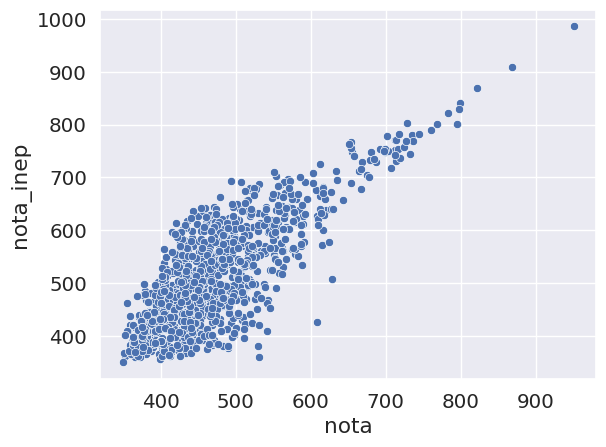

In [23]:
sns.scatterplot(x=notas['nota'],y=padr['nota_inep'])

In [54]:
def enemfig(ano,area):    
    #padr, notas_inep = load_padr(prova,1000,nota_inep=True)
    padr = load_acertos(ano,area,2000)
    notas = score_inep(padr,ano,area,enemscale=True)
    notas = notas.sort_values('nota',ascending=False) 
    divs = []
    centers = []
    div_corrente = 0
    for i,(nota,se) in notas.iterrows():
        if nota-se > div_corrente:
            divs.append(nota-se)
            centers.append(nota)
            div_corrente = nota+se
    divs.append(div_corrente)
    divs = np.array(divs)
    centers = np.array(centers)
    errs = centers - divs[:-1]
    x = list(range(1,len(notas)+1))
    y = notas['nota']
    se = notas['se']
    fig = plt.figure(figsize=(10,7))
    plt.errorbar(x,y,yerr=se,fmt='',errorevery=10,alpha=0.9)
    plt.scatter(x, y,marker=None,s = 0,edgecolor = 'indianred')
    #plt.errorbar(np.zeros(len(centers))-20,centers,yerr=errs,fmt="",elinewidth=5,capsize=20,capthick=5)
    ax = plt.gca()
    ax.set_xticks([1])
    ax.set_ylim(200,1000)
    ax.set_ylabel("Nota ENEM")
    ax.set_xlabel("Ranking dos candidatos")
    notamin = notas['nota'].min()
    notamax = notas['nota'].max()
    notamin = notas['se'].min()
    epmax = notas.iloc[notas['se'].argmax()]
    epmin = notas.iloc[notas['se'].argmin()]
    ax.set_title(f"Notas ENEM {ano} ({area}) em ordem descrescente.\n erro padrão na nota varia de: {epmin['se']:.0f} até {epmax['se']:.0f}")
    return 
interact(enemfig,ano=range(2009,2024),area=['CH','CN','MT']);

interactive(children=(Dropdown(description='ano', options=(2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 201…

In [ ]:
notas = score_inep(padr,ano,area,enemscale=True)

In [33]:
notas.describe()

,nota,se
count,"1,000.00","1,000.00"
mean,476.14,85.00
std,81.29,13.92
min,349.10,26.99
25%,421.94,79.24
50%,458.91,88.52
75%,511.57,93.31
max,950.99,115.81
